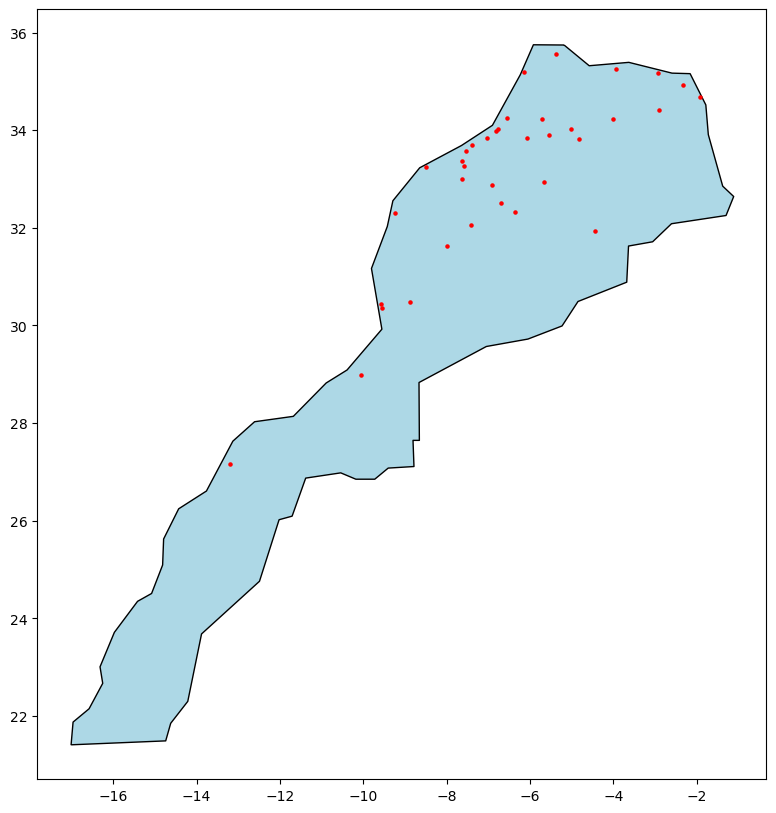

In [3]:
#quick geojson plot test
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data into a GeoDataFrame
gdf_points = gpd.read_file('moroccocities.geojson')
gdf_polygons = gpd.read_file('morocco.geo.json')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf_polygons.plot(ax=ax, color='lightblue', edgecolor='black')  # Plot polygons
gdf_points.plot(ax=ax, color='red', markersize=5)  # Plot points

plt.show()


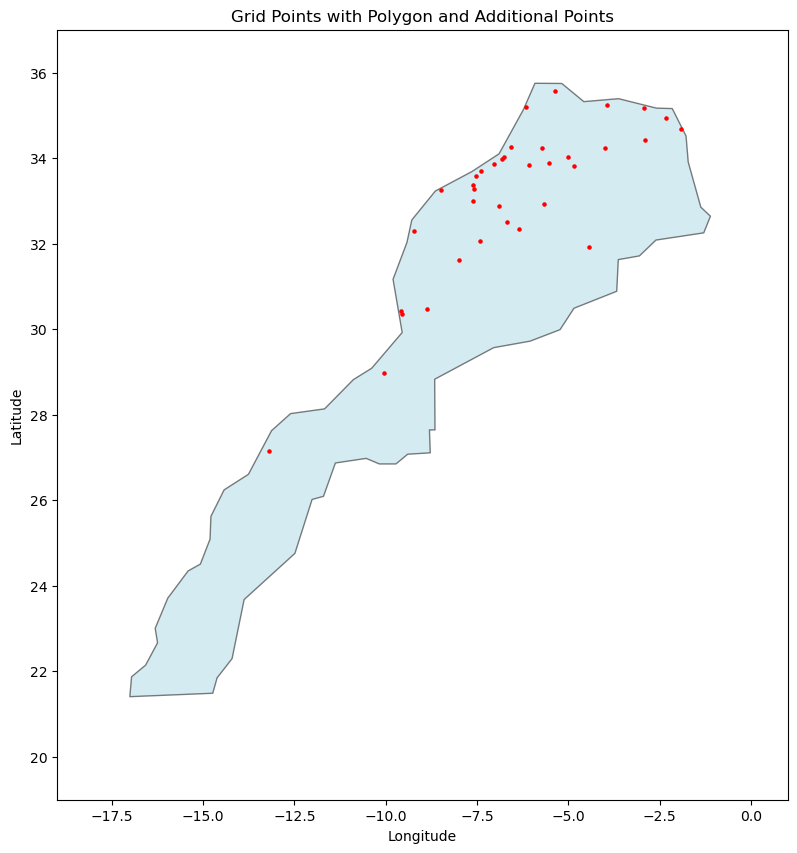

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# Load the polygon and points from GeoJSON files
gdf_polygon = gpd.read_file('morocco.geo.json')  # Replace with your file path
gdf_points = gpd.read_file('moroccocities.geojson')  # Replace with your points file path

# Create a grid (same as before)
polygon = gdf_polygon.geometry[0]
grid_size = 1
x_min, y_min, x_max, y_max = polygon.bounds
x_coords = range(int(x_min), int(x_max) + grid_size, grid_size)
y_coords = range(int(y_min), int(y_max) + grid_size, grid_size)
grid_points = [(x, y) for x in x_coords for y in y_coords]
inside_polygon = [Point(p).within(polygon) for p in grid_points]

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygon
gdf_polygon.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Plot the points from the other GeoJSON file
gdf_points.plot(ax=ax, marker='o', color='red', markersize=5)

# Setting plot limits
ax.set_xlim([min(x_coords)-2, max(x_coords)+2])
ax.set_ylim([min(y_coords)-2, max(y_coords)+2])
ax.set_title("Grid Points with Polygon and Additional Points")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()
